## Práctica 2: Propiedades estadísticas de la lengua

### Fecha de entrega: 2 de Marzo de 2025 11:59pm

1. Verificar si la ley de Zipf se cumple en un lenguaje artificial creado por ustedes.
    - *Ejemplo:* Un "lenguaje artificial" podría ser simplemente un texto donde las secuencias de caracteres fueron generadas aleatoriamente.
2. Explorar `datasets` del sitio [Hugging Face](https://huggingface.co/datasets) y elegir documentos de diferentes dominios en Español (al menos 3). Realizar reconocimiento de entidades nombradas (NER).
    - Pueden utilizar subconjuntos de los datasets encontrados
    - Mostrar resultados del reconocimiento
    - Una distribución de frecuencias de las etiquetas más comunes en cada dominio
    - Comentarios generales del desempeño observado.

*Sugerencias: Spacy, CoreNLP (puede ser cualquier otra herramienta)*

##  **PARTE 1**

In [10]:
!pip install spacy datasets matplotlib
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 10.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import random
import string
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import random
import string
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [2]:
def crear_termino_aleatorio(long_min=4, long_max=10):
    """
    Crea una cadena aleatoria con caracteres.

    Parámetros:
    -----------
    long_min : int
        Tamaño mínimo del término.
    long_max : int
        Tamaño máximo del término.

    Retorna:
    --------
    str
        Término generado aleatoriamente.
    """
    tam = random.randint(long_min, long_max)
    return ''.join(random.choices(string.ascii_lowercase, k=tam))

In [3]:
# Creamos un conjunto inicial de términos únicos
conjunto_terminos = set()
while len(conjunto_terminos) < 5000:
    conjunto_terminos.add(crear_termino_aleatorio())


In [4]:
# Generaramos una secuencia de 100,000 palabras a partir del vocabulario creado
contenido = random.choices(list(conjunto_terminos), k=100000)

In [5]:
# Calculamos la frecuencia de aparición de cada término
conteo = Counter(contenido)

In [6]:
# Convertimos a DataFrame y ordenamos por frecuencia descendente
df_frecuencias = pd.DataFrame(conteo.items(), columns=["termino", "frecuencia"])
df_frecuencias = df_frecuencias.sort_values("frecuencia", ascending=False).reset_index(drop=True)

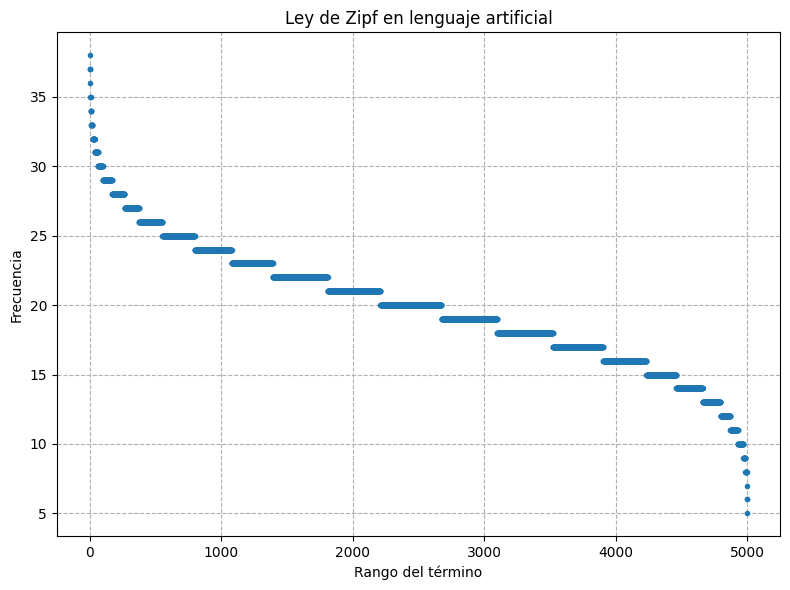

In [7]:

# Graficamos
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(df_frecuencias)+1), df_frecuencias["frecuencia"], marker='.', linestyle='none')
plt.title("Ley de Zipf en lenguaje artificial")
plt.xlabel("Rango del término")
plt.ylabel("Frecuencia")
plt.grid(True, which="both", ls='--')
plt.tight_layout()
plt.show()


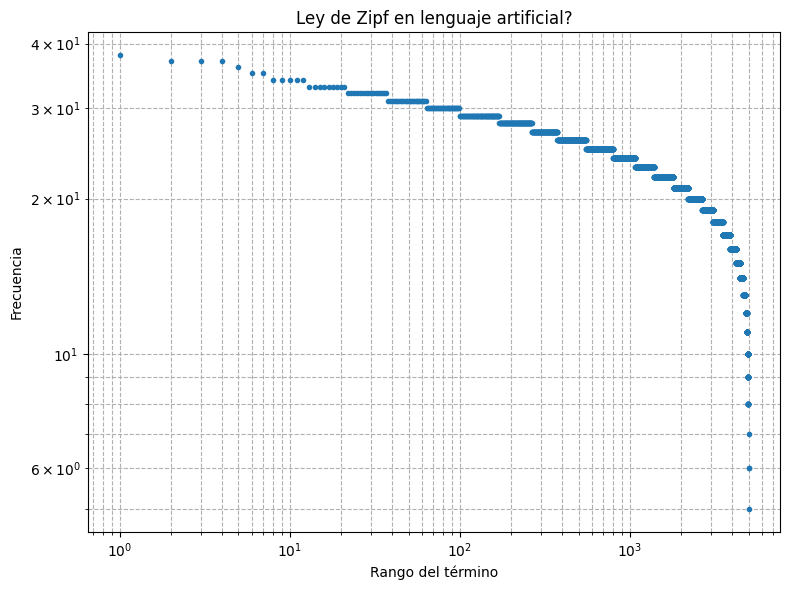

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(df_frecuencias)+1), df_frecuencias["frecuencia"], marker='.', linestyle='none')
plt.xscale("log")
plt.yscale("log")
plt.title("Ley de Zipf en lenguaje artificial?")
plt.xlabel("Rango del término")
plt.ylabel("Frecuencia")
plt.grid(True, which="both", ls='--')
plt.tight_layout()
plt.show()

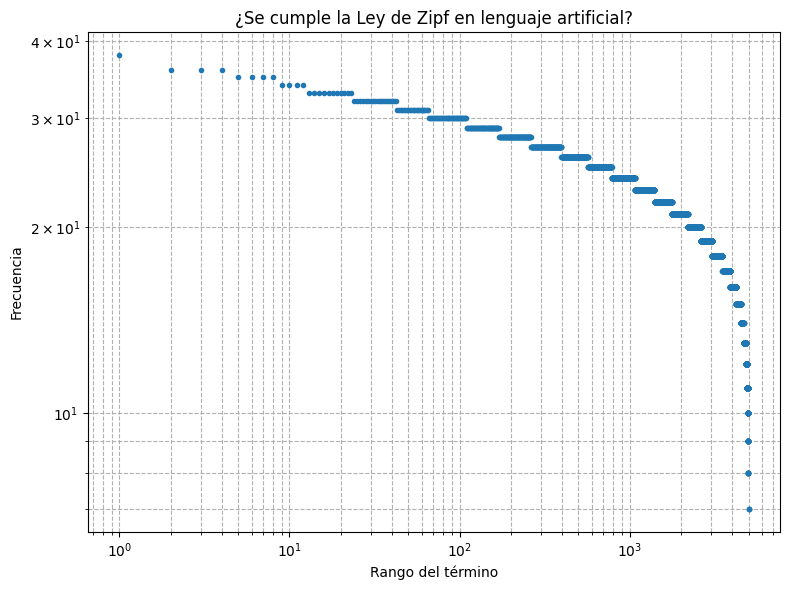

In [9]:
def crear_termino_aleatorio(long_min=4, long_max=10):
    """
    Crea una cadena aleatoria con caracteres en minúscula.

    Parámetros:
    -----------
    long_min : int
        Tamaño mínimo del término.
    long_max : int
        Tamaño máximo del término.

    Retorna:
    --------
    str
        Término generado aleatoriamente.
    """
    tam = random.randint(long_min, long_max)
    return ''.join(random.choices(string.ascii_lowercase, k=tam))

# 1. Crear un conjunto inicial de términos únicos
conjunto_terminos = set()
while len(conjunto_terminos) < 5000:
    conjunto_terminos.add(crear_termino_aleatorio())

# 2. Generar una secuencia de 100,000 palabras a partir del vocabulario creado
contenido = random.choices(list(conjunto_terminos), k=100000)

# 3. Calcular frecuencia de aparición de cada término
conteo = Counter(contenido)

# 4. Convertir a DataFrame y ordenar por frecuencia descendente
df_frecuencias = pd.DataFrame(conteo.items(), columns=["termino", "frecuencia"])
df_frecuencias = df_frecuencias.sort_values("frecuencia", ascending=False).reset_index(drop=True)

# 5. Representar gráficamente la distribución en escala log-log
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(df_frecuencias)+1), df_frecuencias["frecuencia"], marker='.', linestyle='none')
plt.xscale("log")
plt.yscale("log")
plt.title("¿Se cumple la Ley de Zipf en lenguaje artificial?")
plt.xlabel("Rango del término")
plt.ylabel("Frecuencia")
plt.grid(True, which="both", ls='--')
plt.tight_layout()
plt.show()


##  **PARTE 2**

In [ ]:
!pip install datasets spacy transformers
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 16.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
pip install conllu

In [11]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
from datasets import load_dataset
import pandas as pd

# Configurar el modelo y pipeline
model_name = "mrm8488/bert-spanish-cased-finetuned-ner"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple", device=-1)  # CPU

def process_dataset(domain, ds_name, subset=None):
    print(f"\nProcesando dominio: {domain}")

    # Cargar dataset
    if subset:
        dataset = load_dataset(ds_name, subset, trust_remote_code=True)
    else:
        dataset = load_dataset(ds_name, trust_remote_code=True)

    # Tomar solo una muestra por rapidez
    examples = dataset['train'][:5]['tokens'] if 'tokens' in dataset['train'].features else dataset['train'][:5]['text']

    results = []
    for example in examples:
        # Convertir lista de tokens a string si es necesario
        sentence = " ".join(example) if isinstance(example, list) else example
        entities = ner_pipeline(sentence)
        for ent in entities:
            results.append({
                "domain": domain,
                "text": sentence,
                "entity": ent['entity_group'],
                "word": ent['word'],
                "score": round(ent['score'], 4),
                "start": ent['start'],
                "end": ent['end']
            })

    return pd.DataFrame(results)

# Datasets organizados por dominio
datasets_info = {
    'wiki': ('PlanTL-GOB-ES/UD_Spanish-AnCora', 'es_ancora'),
    'noticias': ('conll2002', 'es'),
    'biomedicina': ('PlanTL-GOB-ES/cantemist-ner', None)  # Alternativa válida al dataset que dio error
}

# Procesar todos los dominios
dfs = []
for domain, (ds_name, subset) in datasets_info.items():
    try:
        df = process_dataset(domain, ds_name, subset)
        dfs.append(df)
    except Exception as e:
        print(f"Error procesando el dominio '{domain}': {e}")


Some weights of the model checkpoint at mrm8488/bert-spanish-cased-finetuned-ner were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu



Procesando dominio: wiki


es_ancora-ud-train.conllu:   0%|          | 0.00/42.5M [00:00<?, ?B/s]

es_ancora-ud-dev.conllu:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

es_ancora-ud-test.conllu:   0%|          | 0.00/5.08M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



Procesando dominio: noticias

Procesando dominio: biomedicina


In [12]:
# Unir resultados
if dfs:
    all_results = pd.concat(dfs, ignore_index=True)
    print("\nResumen de entidades extraídas:")
    print(all_results.head())
else:
    print("No se pudo procesar ningún dominio.")


Resumen de entidades extraídas:
  domain                                               text entity  \
0   wiki  Las reservas de oro y divisas de Rusia subiero...    LOC   
1   wiki  Las reservas de oro y divisas de Rusia subiero...    ORG   
2   wiki  Según el informe , el 19 de mayo las reservas ...    ORG   
3   wiki  Los activos en divisas en poder del de el Banc...    ORG   
4   wiki  Los activos en divisas en poder del de el Banc...    ORG   

                     word   score  start  end  
0                   Rusia  0.9997     33   38  
1           Banco Central  0.9998    166  179  
2           Banco Central  0.9998     73   86  
3           Banco Central  0.9998     42   55  
4  Ministerio de Finanzas  0.9998     61   83  



Frecuencia de entidades en el dominio 'wiki':
entity
ORG    8
LOC    2
PER    1
Name: count, dtype: int64


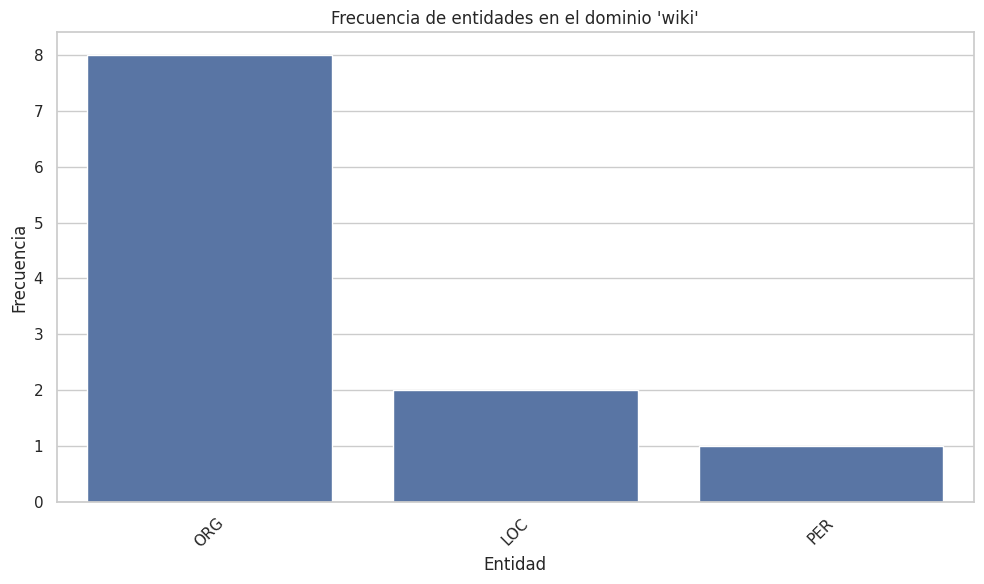


Frecuencia de entidades en el dominio 'noticias':
entity
LOC     5
ORG     3
PER     3
MISC    2
Name: count, dtype: int64


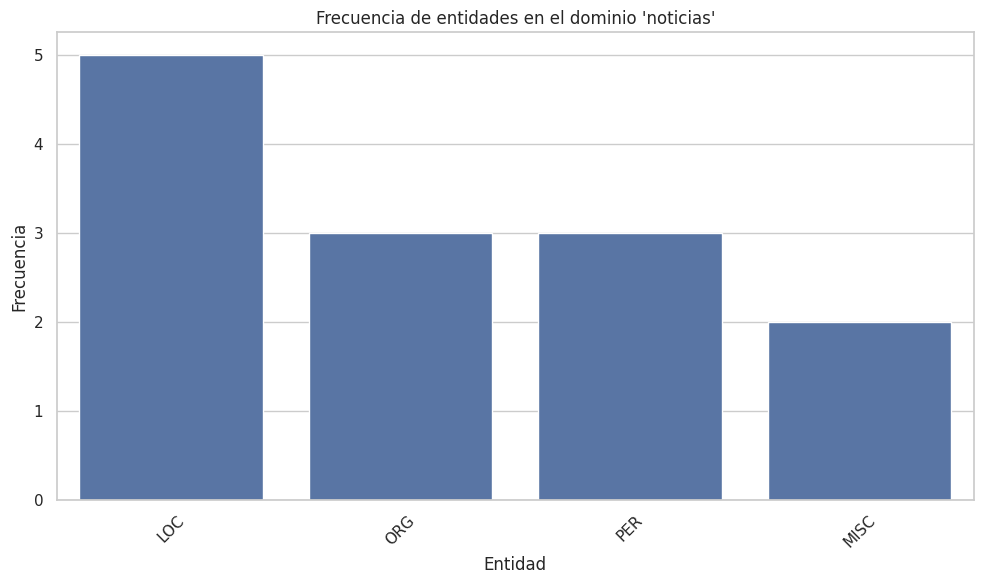


Frecuencia de entidades en el dominio 'biomedicina':
entity
MISC    7
ORG     2
Name: count, dtype: int64


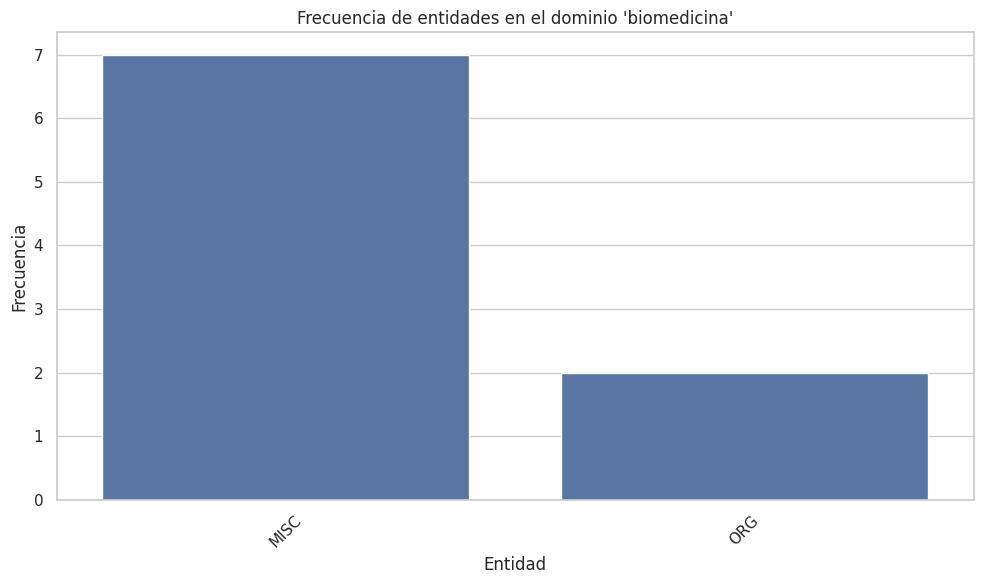

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for domain in all_results['domain'].unique():
    subset = all_results[all_results['domain'] == domain]
    freq = subset['entity'].value_counts()
    print(f"\nFrecuencia de entidades en el dominio '{domain}':")
    print(freq)

    # Visualización
    plt.figure(figsize=(10, 6))
    sns.barplot(x=freq.index, y=freq.values)
    plt.title(f"Frecuencia de entidades en el dominio '{domain}'")
    plt.xlabel("Entidad")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Análisis de Distribución de Frecuencias de Entidades Nombradas por Dominio

### 1. Dominio **wiki**
- **Entidades predominantes:** `ORG` (organizaciones) con una frecuencia notablemente alta (8), seguida por `LOC` (localizaciones) y `PER` (personas) en menor cantidad.
- **Análisis:** El dominio tipo "wiki" (probablemente Wikipedia) suele centrarse en descripciones de organizaciones (instituciones, empresas, etc.), lo cual se refleja en la alta frecuencia de `ORG`. Las entidades `PER` y `LOC` aparecen en menor medida, posiblemente en contextos secundarios.


### 2. Dominio **noticias**
- **Entidades predominantes:** `LOC` (5), seguido de `ORG` y `PER` (3 cada una), y `MISC` (2).
- **Análisis:** Este dominio muestra un equilibrio más uniforme entre categorías principales. La prominencia de `LOC` sugiere que los eventos geográficos o ubicaciones son cruciales en textos periodísticos. `MISC` (misceláneo) aparece como categoría adicional, lo cual podría reflejar términos ambiguos o especializados.



### 3. Dominio **biomedicina**
- **Entidades predominantes:** `MISC` (7), seguida de `ORG` (2).
- **Análisis:** En este dominio especializado, las entidades tradicionales como `PER` y `LOC` están ausentes. El alto número de `MISC` sugiere que muchas entidades biomédicas (como nombres de compuestos, enfermedades o equipos) no están bien representadas por etiquetas estándar. Esto indica una limitación del modelo NER generalista en este dominio.



